<a href="https://colab.research.google.com/github/yamaguchinorimitsu/ajax_app/blob/master/%E7%B7%B4%E7%BF%92%EF%BC%92.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score


# CSVファイルを読み込み
df = pd.read_csv('/content/cinema.csv')

df.head()

,cinema_id,SNS1,SNS2,actor,original,sales
0,1375,291.0,1044,8808.994029,0,9731
1,1000,363.0,568,10290.709370,1,10210
2,1390,158.0,431,6340.388534,1,8227
3,1499,261.0,578,8250.485081,0,9658
4,1164,209.0,683,10908.539550,0,9286


In [3]:
# 欠損値の確認
missing_values = df.isnull().sum()
print("欠損値の数:\n", missing_values)

欠損値の数:
 cinema_id    0
SNS1         1
SNS2         0
actor        1
original     0
sales        0
dtype: int64


In [12]:
# 欠損値を平均値で補完
df2 = df.fillna(df.mean(numeric_only=True))

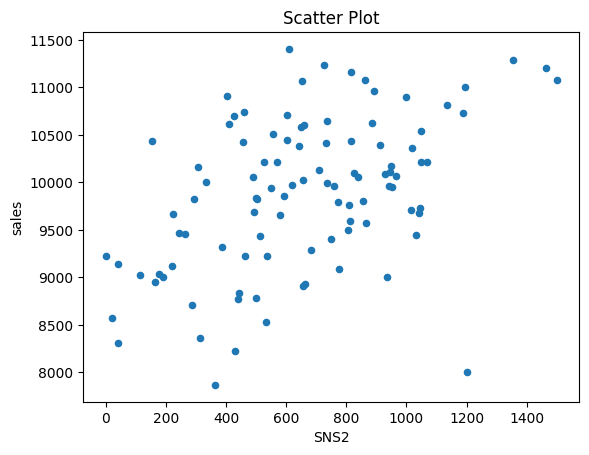

In [14]:
import matplotlib.pyplot as plt

df2.plot(kind='scatter', x='SNS2', y='sales')
plt.xlabel('SNS2')
plt.ylabel('sales')
plt.title('Scatter Plot')
plt.show()

In [24]:


# 外れ値を除外したデータを作成
no = df2[(df2['SNS2'] > 1000) & (df2['sales'] <= 8000)].index

#外れ値を削除
df3 = df2.drop(no,axis=0)

df3.shape

(99, 6)

In [25]:
X = df3.loc[ : , 'SNS1':'original'] # 特徴量の取り出し
y = df3['sales'] # 正解ラベルの取り出し

In [26]:
# 訓練データとテストデータの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=39)
